<a href="https://colab.research.google.com/github/dantecomedia/Gesture-Recognition-/blob/master/gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
import cv2

In [11]:
import shutil
shutil.copyfile("/content/gdrive/My Drive/Sign Language Dataset/sign-language-mnist.zip","/content/sign")

'/content/sign'

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, Flatten
from keras.layers import MaxPool2D
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
!unzip /content/sign-language-mnist.zip

Archive:  /content/sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [0]:
train=pd.read_csv("/content/sign_mnist_train.csv")
test=pd.read_csv("/content/sign_mnist_test.csv")

In [17]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [18]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [0]:
from IPython.display import Image

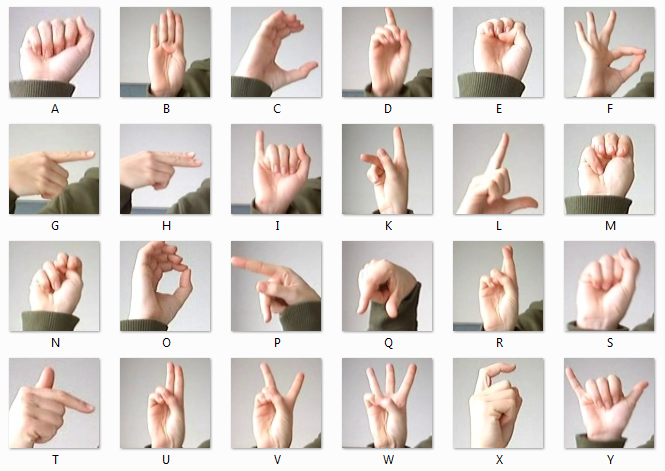

In [20]:
Image("/content/amer_sign2.png")

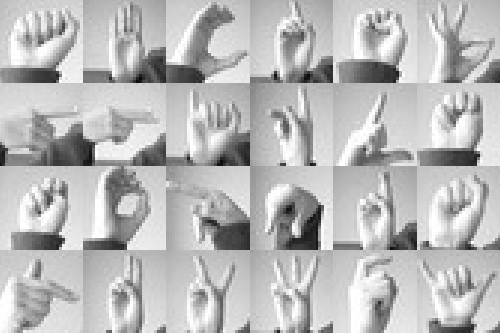

In [21]:
Image("/content/amer_sign3.png")

In [0]:
label=train['label'].values

In [23]:
label

array([ 3,  6,  2, ..., 18, 17, 23])

In [0]:
unique_val=np.array(label)

In [25]:
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

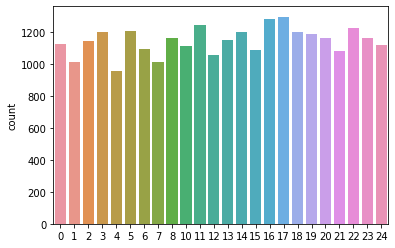

In [26]:
sns.countplot(x=label)

In [0]:
train.drop('label', axis=1, inplace=True)

In [28]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [0]:
images=train.values

In [0]:
images=np.array([np.reshape(i,(28,28)) for i in images])

In [0]:
images=np.array([i.flatten() for i in images ])

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb=LabelBinarizer()

In [0]:
label=lb.fit_transform(label)

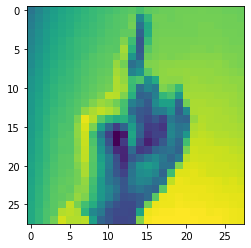

In [35]:
plt.imshow(images[0].reshape(28,28))

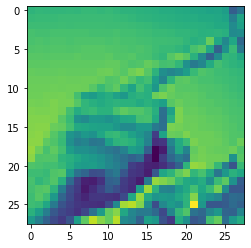

In [36]:
plt.imshow(images[1].reshape(28,28))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, label, test_size = 0.3, random_state = 101)


In [0]:
batch_size = 128
num_classes = 24
epochs = 50

In [0]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

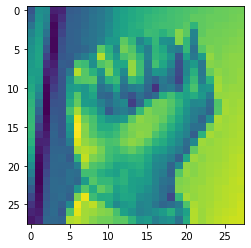

In [41]:


plt.imshow(x_train[0].reshape(28,28))



In [42]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 19218 samples, validate on 8237 samples
Epoch 1/50





19218/19218 [==============================] - 15s 784us/step - loss: 2.6119 - acc: 0.1979 - val_loss: 1.7642 - val_acc: 0.4265
Epoch 2/50
19218/19218 [==============================] - 1s 54us/step - loss: 1.3062 - acc: 0.5671 - val_loss: 0.8261 - val_acc: 0.7296
Epoch 3/50
19218/19218 [==============================] - 1s 54us/step - loss: 0.7435 - acc: 0.7509 - val_loss: 0.5119 - val_acc: 0.8344
Epoch 4/50
19218/19218 [==============================] - 1s 54us/step - loss: 0.4724 - acc: 0.8391 - val_loss: 0.3058 - val_acc: 0.9058
Epoch 5/50
19218/19218 [==============================] - 1s 54us/step - loss: 0.3253 - acc: 0.8912 - val_loss: 0.1834 - val_acc: 0.9476
Epoch 6/50
19218/19218 [==============================] - 1s 54us/step - loss: 0.2161 - acc: 0.9292 - val_loss: 0.1531 - val_acc: 0.9542
Epoch 7/50
19218/19218 [=

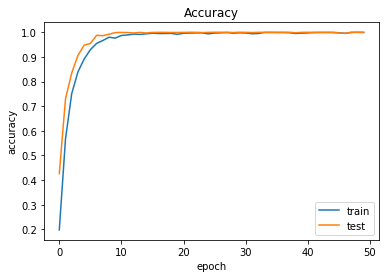

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()


In [0]:
test_labels = test['label']

In [0]:
test.drop('label', axis = 1, inplace = True)

In [0]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [0]:
test_labels = lb.fit_transform(test_labels)

In [0]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [51]:
test_images.shape

(7172, 28, 28, 1)

In [0]:
y_pred = model.predict(test_images)

In [0]:
from sklearn.metrics import  classification_report

In [54]:
classification_report(test_labels, y_pred.round())

'              precision    recall  f1-score   support\n\n           0       0.92      0.94      0.93       331\n           1       0.99      0.95      0.97       432\n           2       0.95      0.85      0.90       310\n           3       0.81      0.91      0.86       245\n           4       0.98      0.95      0.97       498\n           5       0.98      1.00      0.99       247\n           6       0.84      0.82      0.83       348\n           7       0.92      0.92      0.92       436\n           8       0.88      0.95      0.91       288\n           9       0.96      0.70      0.81       331\n          10       0.79      1.00      0.89       209\n          11       0.95      0.88      0.91       394\n          12       1.00      0.82      0.90       291\n          13       0.82      0.91      0.86       246\n          14       0.97      0.90      0.93       347\n          15       0.81      1.00      0.89       164\n          16       0.40      0.56      0.47       144\n       

In [55]:
classification_report(test_labels, y_pred.round())

'              precision    recall  f1-score   support\n\n           0       0.92      0.94      0.93       331\n           1       0.99      0.95      0.97       432\n           2       0.95      0.85      0.90       310\n           3       0.81      0.91      0.86       245\n           4       0.98      0.95      0.97       498\n           5       0.98      1.00      0.99       247\n           6       0.84      0.82      0.83       348\n           7       0.92      0.92      0.92       436\n           8       0.88      0.95      0.91       288\n           9       0.96      0.70      0.81       331\n          10       0.79      1.00      0.89       209\n          11       0.95      0.88      0.91       394\n          12       1.00      0.82      0.90       291\n          13       0.82      0.91      0.86       246\n          14       0.97      0.90      0.93       347\n          15       0.81      1.00      0.89       164\n          16       0.40      0.56      0.47       144\n       

In [0]:
y_pred_val=model.predict(x_test)

In [57]:
classification_report(y_test, y_pred_val.round())

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       336\n           1       1.00      1.00      1.00       302\n           2       1.00      1.00      1.00       353\n           3       1.00      1.00      1.00       350\n           4       1.00      1.00      1.00       280\n           5       1.00      1.00      1.00       369\n           6       1.00      1.00      1.00       314\n           7       1.00      1.00      1.00       326\n           8       1.00      1.00      1.00       344\n           9       1.00      1.00      1.00       334\n          10       1.00      1.00      1.00       344\n          11       1.00      1.00      1.00       338\n          12       1.00      1.00      1.00       353\n          13       1.00      1.00      1.00       351\n          14       1.00      1.00      1.00       302\n          15       1.00      1.00      1.00       399\n          16       1.00      1.00      1.00       402\n       

In [0]:
from keras.models import load_model

In [0]:
model.save("weights_gesture.h5")